In [ ]:
from Himanshu_Lib import LCG, Monte_Carlo_Integration, read_data, Chi_squared_fitting, Solve_LE_LU_Decomposition, MI_LU_Decomposition
import matplotlib.pyplot as plt
from copy import deepcopy
import math

# Mavani Himanshu Assignment 2

# Question 1

Coefficients [[0.5746586674195995], [4.725861442142078], [-11.128217777643616], [7.6686776229096685]] 

Variance_Matrix 
 [[0.5440429136080978, -3.9604115691067845, 7.716920760397946, -4.3917435221776], [-3.960411569106761, 42.869122007178575, -97.35581817960204, 60.14890835637396], [7.716920760397848, -97.35581817960166, 238.27685154912544, -154.09626393605663], [-4.391743522177528, 60.148908356373575, -154.0962639360563, 102.73084262403798]] 

A [[21.0, 10.499999999999998, 7.174999999999999, 5.5125], [10.499999999999998, 7.174999999999999, 5.5125, 4.516662500000001], [7.174999999999999, 5.5125, 4.516662500000001, 3.85415625], [5.5125, 4.516662500000001, 3.85415625, 3.3821220312499998]]


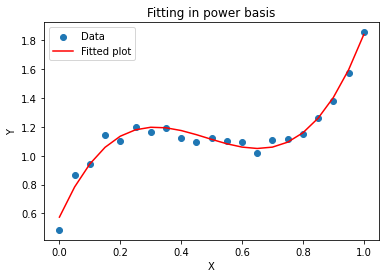

In [ ]:
X, Y, std = read_data('assign2fit.txt')
Coefficients, Variance_Matrix, A1 = Chi_squared_fitting(X, Y, std, 3)
print('Coefficients', Coefficients, '\n')
print('Variance_Matrix \n', Variance_Matrix, '\n')
print('A', A1)
f = []
for data in X:
    v = 0
    for i in range(len(Coefficients)):
        v += Coefficients[i][0]*(data**i)
    f += [v]
plt.scatter(X, Y, label = 'Data')
plt.plot(X, f, '-r', label = 'Fitted plot')
plt.title('Fitting in power basis')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Modified Coefficients: [[1.1609694790335525], [0.39351446798815237], [0.04684983209010658], [0.23964617571596986]] 

Variance_Matrix 
 [[0.05554399833576034, 2.118889052292686e-17, 0.029718565187672727, 5.322600644414036e-17], [2.1188890522926858e-17, 0.14345628380716105, 3.504678676646284e-18, 0.036918896568019444], [0.029718565187672727, 3.504678676646284e-18, 0.11144461945377275, 7.194797693443246e-18], [5.322600644414036e-17, 0.036918896568019444, 7.194797693443246e-18, 0.10032308850005271]] 

A [[21, -2.220446049250313e-16, -5.599999999999999, -1.0658141036401503e-14], [-2.220446049250313e-16, 7.7, 0.0, -2.8336000000000032], [-5.599999999999999, 0.0, 10.4664, 2.220446049250313e-15], [-1.0658141036401503e-14, -2.8336000000000032, 2.220446049250313e-15, 11.010559999999996]]


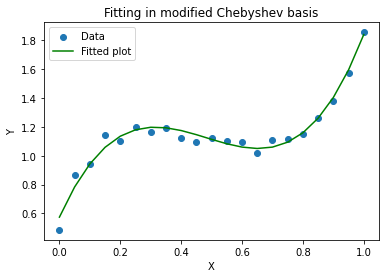

In [ ]:
def phi(x):
    return [1, 2*x-1, 8*(x**2)-8*x+1, 32*(x**3)-48*(x**2)+18*x-1]


def Fitting_in_given_basis(x, y, phi):
    degree = len(phi(0))-1
    N = len(x)
    A = [[0 for i in range(degree+1)] for j in range(degree+1)]
    b = [[0] for i in range(degree+1)]
    for i in range(N):
        for j in range(degree+1):
            b[j][0] += (phi(x[i])[j])*y[i]
            for k in range(degree+1):            
                A[j][k] += (phi(x[i])[j])*(phi(x[i])[k])
    A1 = deepcopy(A)
    Coefficients = Solve_LE_LU_Decomposition(A,b)
    A = deepcopy(A1)
    Variance_Matrix = MI_LU_Decomposition(A1)
    return Coefficients, Variance_Matrix, A


Coeff2, Variance_Matrix2, A2 = Fitting_in_given_basis(X,Y,phi)
print('Modified Coefficients:', Coeff2, '\n')
print('Variance_Matrix \n', Variance_Matrix2, '\n')
print('A', A2)
f2 = []
for data in X:
    v = 0
    for i in range(len(Coeff2)):
        v += Coeff2[i][0]*(phi(data)[i])
    f2 += [v]
plt.scatter(X, Y, label = 'Data')
plt.plot(X, f2, '-g', label = 'Fitted plot')
plt.title('Fitting in modified Chebyshev basis')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In the basis of powers of "x" we get condition number 44.1875\
In the basis of modified Chebyshev we get condition number 26.6\
2nd method is good since it has low condition number means inverse can computed easily\
and 2nd method also has low covarience as compared to 1st one.

# Question 2

In [6]:
def f_pi(x):
    return math.sqrt(1-x**2)

def pi_by_throws(a,m, seed, N):
    X = LCG(a, 0, m, seed, N)
    Y = LCG(a, 0, m, seed, N)

    Points_in_Circle = 0
    pi_Monte_Carlo = 0
    for x in X:
        pi_Monte_Carlo += f_pi(x)
        for y in Y:
            if math.sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
                Points_in_Circle += 1
    
    pi_Monte_Carlo = 4*pi_Monte_Carlo/N
    pi_by_throws = 4*Points_in_Circle/(N**2)
    return pi_by_throws, pi_Monte_Carlo

pi_t1, pi_m1 = pi_by_throws(65, 1021, 21, 10000)
pi_t2, pi_m2 = pi_by_throws(572, 16381, 21, 10000)

print('Value of pi by random throw using a = 65, m=1021 is :', pi_t1)
print('Value of pi by random throw using a = 572, m=16381 is :', pi_t2)
print('Value of pi by Monte Carlo Integration using a = 65, m=1021 is :', pi_m1)
print('Value of pi by Monte Carlo Integration using a = 572, m=16381 is :', pi_m2)


Value of pi by random throw using a = 65, m=1021 is : 3.1491712
Value of pi by random throw using a = 572, m=16381 is : 3.15010272
Value of pi by Monte Carlo Integration using a = 65, m=1021 is : 3.1409839306310117
Value of pi by Monte Carlo Integration using a = 572, m=16381 is : 3.1471113644663666


We can see that nearest pi value is coming for "a = 572" and "m=16381" in $10^{4}$ iteration

# Question 3

In [24]:
def Steinmetz_solid(N):
    a = 572
    m = 16381
    X = LCG(a, 0, m, 3, N)
    Y = LCG(a, 0, m, 0.2, N)
    Z = LCG(a, 0, m, 13, N)
    for i in range(N):
        X[i] = 2*(X[i])-1
        Y[i] = 2*(Y[i])-1
        Z[i] = 2*(Z[i])-1
    Points_inside_intersection = 0
    for x in X:
        for y in Y:
            for z in Z:
                if math.sqrt((x)**2 + (y)**2) < 1 and math.sqrt((z)**2 + (y)**2) < 1:
                    Points_inside_intersection += 1
    vol = 8*Points_inside_intersection/(N**3)
    print('Volume of Steinmetz solid of radius 1 is: ',vol)

Steinmetz_solid(1000)
    

Volume of Steinmetz solid of radius 1 is:  5.287934808


In [17]:
def Steinmetz_solid_f(y):
    return 8*(1-y**2)

Vol_Steinmetz_MCInt = Monte_Carlo_Integration(0,1,Steinmetz_solid_f, 20000)
print('Volume of Steinmetz solid using monte carlo integration is : ', Vol_Steinmetz_MCInt)

Volume of Steinmetz solid using monte carlo method is :  5.337350055733758


Convergence of Monte Carlo Integration is way faster than the random throw method\
The volume of Steinmetz solid of radius 1 is close to the actual volume $\frac{16}{3}$ = 5.33333...